<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.054227,0.000581,102.054808,102.056606,-0.001798
1,0.0,1.0,71.346986,0.001258,81.348244,81.346855,0.001388
2,0.0,2.0,61.117537,0.001121,71.118658,71.116167,0.002491
3,0.0,3.0,54.537932,0.002470,64.540402,64.535764,0.004637
4,0.0,4.0,29.850485,-0.003346,39.847139,39.845327,0.001813
...,...,...,...,...,...,...,...
19995,999.0,15.0,63.860203,-0.001478,73.858725,73.860700,-0.001975
19996,999.0,16.0,63.802932,-0.002815,73.800116,73.803425,-0.003309
19997,999.0,17.0,52.115893,0.002476,62.118369,62.115526,0.002843
19998,999.0,18.0,79.097552,-0.000391,89.097160,89.099170,-0.002009


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.054227,0.000581,102.054808,102.056606,-0.001798
1,0.0,1.0,71.346986,0.001258,81.348244,81.346855,0.001388
2,0.0,2.0,61.117537,0.001121,71.118658,71.116167,0.002491
3,0.0,3.0,54.537932,0.002470,64.540402,64.535764,0.004637
4,0.0,4.0,29.850485,-0.003346,39.847139,39.845327,0.001813
...,...,...,...,...,...,...,...
19995,999.0,15.0,63.860203,-0.001478,73.858725,73.860700,-0.001975
19996,999.0,16.0,63.802932,-0.002815,73.800116,73.803425,-0.003309
19997,999.0,17.0,52.115893,0.002476,62.118369,62.115526,0.002843
19998,999.0,18.0,79.097552,-0.000391,89.097160,89.099170,-0.002009


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.054227  0.000581  102.054808  102.056606 -0.001798
      1.0    71.346986  0.001258   81.348244   81.346855  0.001388
      2.0    61.117537  0.001121   71.118658   71.116167  0.002491
      3.0    54.537932  0.002470   64.540402   64.535764  0.004637
      4.0    29.850485 -0.003346   39.847139   39.845327  0.001813
...                ...       ...         ...         ...       ...
999.0 15.0   63.860203 -0.001478   73.858725   73.860700 -0.001975
      16.0   63.802932 -0.002815   73.800116   73.803425 -0.003309
      17.0   52.115893  0.002476   62.118369   62.115526  0.002843
      18.0   79.097552 -0.000391   89.097160   89.099170 -0.002009
      19.0   50.190673  0.004493   60.195166   60.190165  0.005001

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.054227  0.000581  102.054808  102.056606 -0.001798
      1.0    71.346986  0.001258   81.348244   81.346855  0.001388
      2.0    61.117537  0.001121   71.118658   71.116167  0.002491
      3.0    54.537932  0.002470   64.540402   64.535764  0.004637
      4.0    29.850485 -0.003346   39.847139   39.845327  0.001813
...                ...       ...         ...         ...       ...
999.0 15.0   63.860203 -0.001478   73.858725   73.860700 -0.001975
      16.0   63.802932 -0.002815   73.800116   73.803425 -0.003309
      17.0   52.115893  0.002476   62.118369   62.115526  0.002843
      18.0   79.097552 -0.000391   89.097160   89.099170 -0.002009
      19.0   50.190673  0.004493   60.195166   60.190165  0.005001

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.054227,0.000581,102.054808,102.056606,-0.001798
1,0.0,1.0,71.346986,0.001258,81.348244,81.346855,0.001388
2,0.0,2.0,61.117537,0.001121,71.118658,71.116167,0.002491
3,0.0,3.0,54.537932,0.002470,64.540402,64.535764,0.004637
4,0.0,4.0,29.850485,-0.003346,39.847139,39.845327,0.001813
...,...,...,...,...,...,...,...
19995,999.0,15.0,63.860203,-0.001478,73.858725,73.860700,-0.001975
19996,999.0,16.0,63.802932,-0.002815,73.800116,73.803425,-0.003309
19997,999.0,17.0,52.115893,0.002476,62.118369,62.115526,0.002843
19998,999.0,18.0,79.097552,-0.000391,89.097160,89.099170,-0.002009


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.054227  0.000581  102.054808  102.056606 -0.001798
      1.0    71.346986  0.001258   81.348244   81.346855  0.001388
      2.0    61.117537  0.001121   71.118658   71.116167  0.002491
      3.0    54.537932  0.002470   64.540402   64.535764  0.004637
      4.0    29.850485 -0.003346   39.847139   39.845327  0.001813
...                ...       ...         ...         ...       ...
999.0 15.0   63.860203 -0.001478   73.858725   73.860700 -0.001975
      16.0   63.802932 -0.002815   73.800116   73.803425 -0.003309
      17.0   52.115893  0.002476   62.118369   62.115526  0.002843
      18.0   79.097552 -0.000391   89.097160   89.099170 -0.002009
      19.0   50.190673  0.004493   60.195166   60.190165  0.005001

[20000 rows x 5 columns]

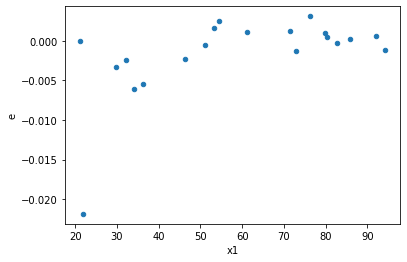

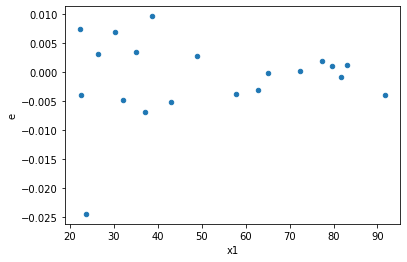

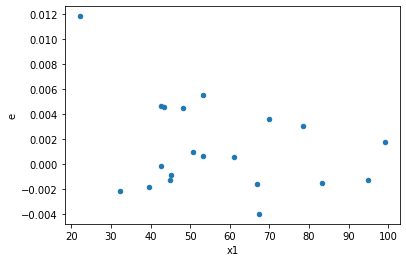

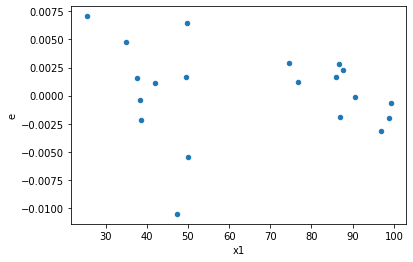

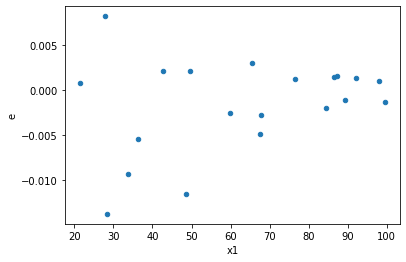

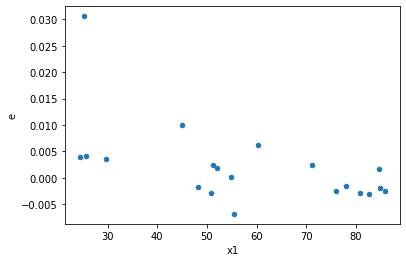

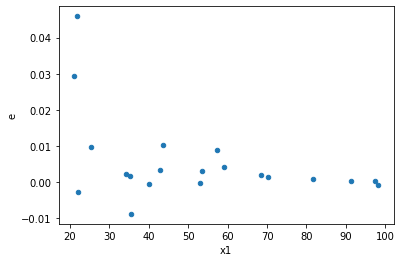

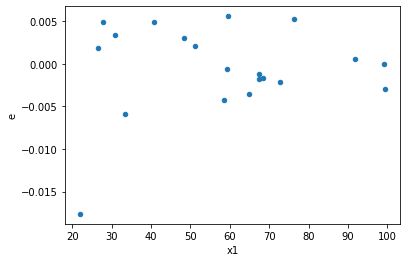

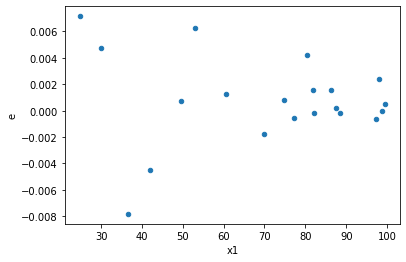

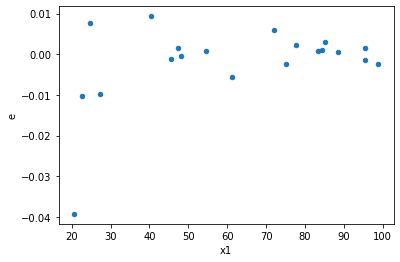

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
38.0,7.0,7.0,4.152341857683112e-05,4.576843429432675e-05,5.931916939547303e-06,6.538347756332393e-06,1.10223184561842,0.9011265070187933,0.5494367464906034,0.45056325350939663,Reject001=1 : Homoscedasticity
171.0,7.0,7.0,3.2360413107554426e-05,3.6769426599456145e-05,4.6229161582220605e-06,5.252775228493735e-06,1.1362471324839933,0.8705106586958973,0.5647446706520514,0.43525532934794864,Reject001=1 : Homoscedasticity
321.0,7.0,7.0,3.491695548572112e-05,7.073206710203756e-05,4.98813649796016e-06,1.0104581014576794e-05,2.025722635839846,0.3721581418792812,0.8139209290603594,0.1860790709396406,Reject001=1 : Homoscedasticity
370.0,7.0,7.0,3.620363979256497e-05,4.059770134278081e-05,5.171948541794996e-06,5.799671620397259e-06,1.121370712320429,0.883763401383034,0.558118299308483,0.441881700691517,Reject001=1 : Homoscedasticity
523.0,7.0,7.0,4.081231828405447e-05,6.14476533954005e-05,5.8303311834363525e-06,8.778236199342928e-06,1.5056153626883855,0.6026062789718489,0.6986968605140755,0.30130313948592446,Reject001=1 : Homoscedasticity
556.0,7.0,7.0,2.7232411275155587e-05,4.9209937479222035e-05,3.89034446787937e-06,7.029991068460291e-06,1.8070356305215167,0.45315906990500454,0.7734204650474977,0.22657953495250227,Reject001=1 : Homoscedasticity
667.0,7.0,7.0,3.343497039883196e-05,7.359794732753087e-05,4.77642434269028e-06,1.0513992475361552e-05,2.20122663336056,0.31967795520963604,0.840161022395182,0.15983897760481802,Reject001=1 : Homoscedasticity
788.0,7.0,7.0,3.805929038118898e-05,6.498751773763954e-05,5.437041483026997e-06,9.283931105377076e-06,1.7075336162799288,0.4970140633877407,0.7514929683061297,0.24850703169387034,Reject001=1 : Homoscedasticity
910.0,7.0,7.0,4.421675670109291e-06,1.1438515336225815e-05,6.316679528727559e-07,1.6340736194608307e-06,2.5869186683118004,0.23308223306663,0.883458883466685,0.116541116533315,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.0002745714996648431,1.2710154543911499e-05,3.922449995212044e-05,1.8157363634159285e-06,0.04629087344981619,0.0006217657209633691,Reject001=0 : Heteroscedasticity
1.0,7.0,7.0,0.0007491237773358758,3.122917326711784e-05,0.00010701768247655369,4.4613104667311195e-06,0.041687601184117774,0.00044136388981272405,Reject001=0 : Heteroscedasticity
2.0,7.0,7.0,0.00010486230377445406,4.7199945581105807e-05,1.4980329110636295e-05,6.742849368729401e-06,0.4501135668602808,0.31417774022801154,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,0.00010651910182466406,1.8957104836238776e-05,1.521701454638058e-05,2.7081578337483964e-06,0.17796906387216022,0.03659397354043897,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.00042029214350038487,1.4529023272968984e-05,6.004173478576927e-05,2.0755747532812834e-06,0.03456886715027467,0.0002378605837578071,Reject001=0 : Heteroscedasticity
5.0,7.0,7.0,0.0005905906918289936,2.635899499027782e-05,8.437009883271337e-05,3.7655707128968313e-06,0.04463157878199358,0.0005519204187010941,Reject001=0 : Heteroscedasticity
6.0,7.0,7.0,0.001349346877588683,2.255786377972294e-05,0.00019276383965552614,3.2225519685318487e-06,0.016717616614665025,2.0562852978717115e-05,Reject001=0 : Heteroscedasticity
7.0,7.0,7.0,0.00032345984435105436,4.5794203294748246e-05,4.6208549193007764e-05,6.5420290421068925e-06,0.141576161908516,0.01943991094102346,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,0.0001869119155552837,7.1354374802972865e-06,2.6701702222183384e-05,1.019348211471041e-06,0.03817540181480195,0.0003303458825997578,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    636
Reject001=1 : Homoscedasticity      364
Name: Result_test, dtype: int64